In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random
from copy import deepcopy

In [2]:
noise_scale = 100
number_of_samples = 50 
x = 25 *(np.random.rand(number_of_samples,1)-0.8)
y = 5*x + 20*x**2+1*x**3+noise_scale*np.random.randn(number_of_samples,1)

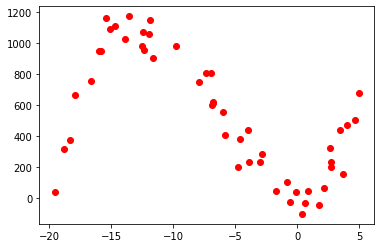

In [3]:
plt.plot(x,y,'ro')
plt.show()

In [4]:
x = np.array(x).flatten().tolist()
y = np.array(y).flatten().tolist()

## 1. Apply a Polynomial to Dataset

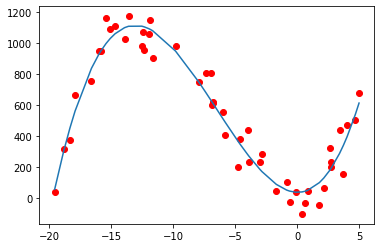

In [5]:
coeff = np.polyfit(x,y,3) 
poly = np.poly1d(coeff)

plt.plot(x,y, 'ro')
sortMe = np.sort(x) 

plt.plot(sortMe, poly(sortMe)) 
plt.show()

In [6]:
coeff

array([ 0.95722717, 18.70988015, -1.44420713, 36.87969478])

--- 

## 2. Genetic Algorithm

1. Formula is y = ax<sup>3</sup> + bx<sup>2</sup> + cx+ d
2. Genes are a, b, c, and d
3. Chromosomes are [a,b,c,d]
4. For one array   
&nbsp;&nbsp;&nbsp; a. for every actual point(x,y)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i. Compute y'=ax<sup>3</sup> + bx<sup>2</sup> + cx+ d    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii. Find the sum of (y'-y)<sup>2</sup> over all x values    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; iii. Sum is your measure of "badness" (larger numbers are worse) 

In [7]:
def createPopulation(size):
    '''
    Creates initial population size
    '''
    chromosomes = []
    for i in range(size): 
        chromosomes.append([random.randint(-50,50) for i in range(4)])
    return chromosomes 

In [8]:
def mutate(individual): 
    '''
    Returns 9 new mutated chromosomes from an individual 
    '''
    
    mutations = []
    mutations.append(individual)
    for _ in range(9): 
        new = deepcopy(individual)
        rand_idx = random.randrange(len(new))
        rand_num = new[rand_idx]
        rand_float = random.uniform(0.0,2.0)
        
        new_num = rand_num * rand_float
        new[rand_idx] = new_num
        
        mutations.append(new)
    return mutations

In [9]:
def cost(i, chromosome): 
    '''
    Returns the cost function of a chromosome 
    '''
    return chromosome[0]*(x[i]**3) + chromosome[1]*(x[i]**2) + chromosome[2]*(x[i])+ chromosome[3]


In [10]:
def fitness(chromosome): 
    '''
    Measures a individual/chromosomes's fitness 
    '''
    badness = 0 
    for i in range(len(x)): 
        pred = cost(i, chromosome)
        yval = y[i]
        badness += (pred - yval)**2

    return (chromosome, round(badness))

In [11]:
def fitnessPopulation(population): 
    '''
    Returns the overall population's best 10 fittest individuals 
    '''
    bestGenes = []
    for i in range(len(population)): 
        individual = population[i]
        scores = fitness(individual)
        bestGenes.append(scores)
    bestGenes = sorted(bestGenes, key = lambda x: float(x[1]), reverse = False)[:10]
    return bestGenes 

In [12]:
def main(): 
    num_generations = 500
    bestGenes = []
    
    # create the starting population 
    population = createPopulation(100)

    # iterate through 500 generations 
    for i in range(num_generations): 

        new_population = []
        
        # find the top 10 best genes of the population to reproduce 
        bestGenes = fitnessPopulation(population)

        for k in range(len(bestGenes)): 

            # add mutations to the best genes 
            newGenes = mutate(bestGenes[k][0])
            # for each new child, add to new population 
            for j in newGenes: 
                new_population.append(j)
            
        # replace old population with new population 
        population = deepcopy(new_population)
        
        len(population)
    return population 

In [13]:
mostFit = main()

In [14]:
new_coeff = fitnessPopulation(mostFit)[0][0]

In [15]:
new_coeff

[1.0903838385667224,
 21.722482116141588,
 9.0527494092426,
 -9.998852769505735e-06]

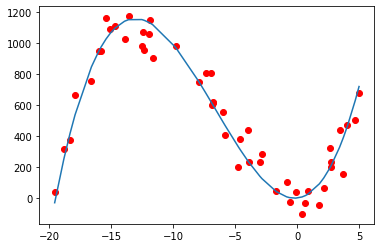

In [16]:
poly = np.poly1d(new_coeff)
plt.plot(x,y, 'ro')
newSorted = np.sort(x) 

plt.plot(newSorted, poly(newSorted)) 
plt.show()

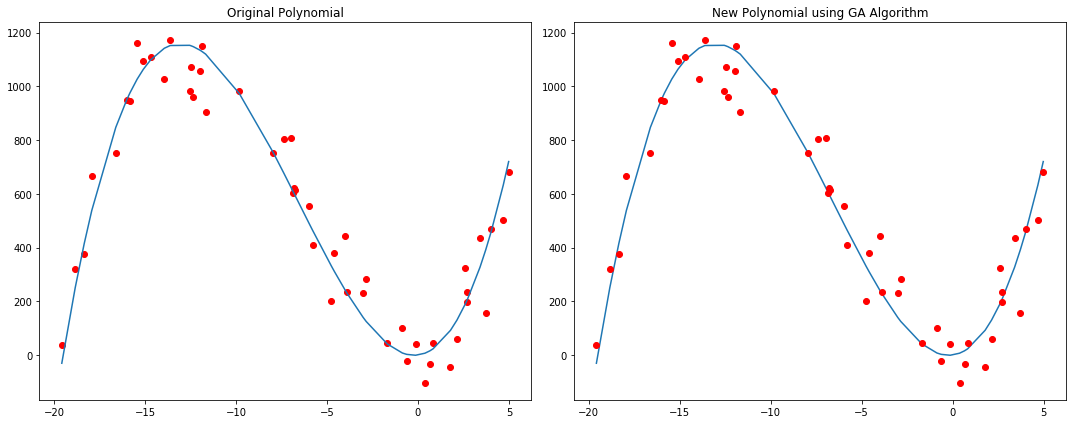

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].plot(x,y, 'ro')
axes[0].plot(sortMe, poly(sortMe))
axes[0].set_title("Original Polynomial")

axes[1].plot(newSorted, poly(newSorted))
axes[1].plot(x,y, 'ro')
axes[1].set_title("New Polynomial using GA Algorithm")

fig.tight_layout()